In [156]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


## Preparar dados

In [157]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [158]:
train_images = os.path.join('Rock-Paper-Scissors', 'train')
validation_images = os.path.join('Rock-Paper-Scissors', 'test')

In [159]:
train_images_rock = os.path.join(train_images,'rock')
train_images_paper = os.path.join(train_images,'paper')
train_images_scissors = os.path.join(train_images,'scissors')
validation_images_rock = os.path.join(validation_images,'rock')
validation_images_paper = os.path.join(validation_images,'paper')
validation_images_scissors = os.path.join(validation_images,'scissors')

In [160]:
num_rock_tr = len(os.listdir(train_images_rock))
num_paper_tr = len(os.listdir(train_images_paper))
num_scissors_tr = len(os.listdir(train_images_scissors))

num_rock_val = len(os.listdir(validation_images_rock))
num_paper_val = len(os.listdir(validation_images_paper))
num_scissors_val = len(os.listdir(validation_images_scissors))

In [161]:
total_train = num_rock_tr + num_paper_tr + num_scissors_tr
total_validation = num_rock_val + num_paper_val + num_scissors_val

In [162]:
train_image_generator = ImageDataGenerator(rescale=1./255)

validation_image_generator = ImageDataGenerator(rescale=1./255)

In [163]:
BATCH_SIZE = 32
IMG_SHAPE = 300 # square image

In [164]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_images,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          class_mode='binary')

validation_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=validation_images,
                                                         shuffle=False,
                                                         target_size=(IMG_SHAPE, IMG_SHAPE),
                                                         class_mode='binary')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


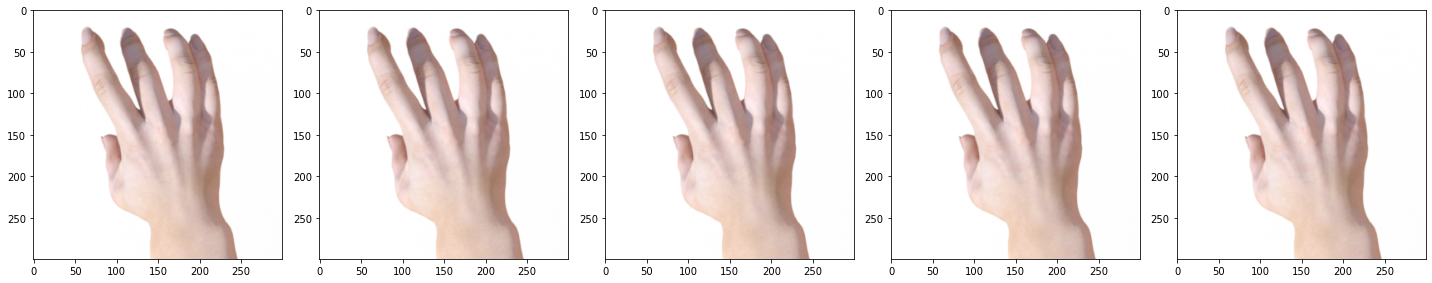

In [165]:
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)

In [166]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax')
    
])

In [167]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [168]:
history = model.fit_generator(train_data_gen,
                             steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                              epochs=10,
                              validation_data=validation_data_gen,
                              validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE)))
                             )

Epoch 1/10


InvalidArgumentError:  Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 2 0 1 1 1 2 1 2 0 2 2 1 0 1 2 2 0 0 1 0 2 1 2 1 2 0 0 2 2 2 1 2
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-168-3b7fd48bddd4>:1) ]] [Op:__inference_train_function_3395]

Function call stack:
train_function
